In [1]:
import pandas as pd

df = pd.read_csv("../data/data.csv")
print(df.head())
print(df.columns)
print(df.shape)

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [2]:
# Drop unnecessary columns
df = df.drop(['id', 'Unnamed: 32'], axis=1)

# Convert diagnosis to numerical
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

print(df.head())
print(df.shape)

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          

In [3]:
print(df['diagnosis'].value_counts())

diagnosis
0    357
1    212
Name: count, dtype: int64


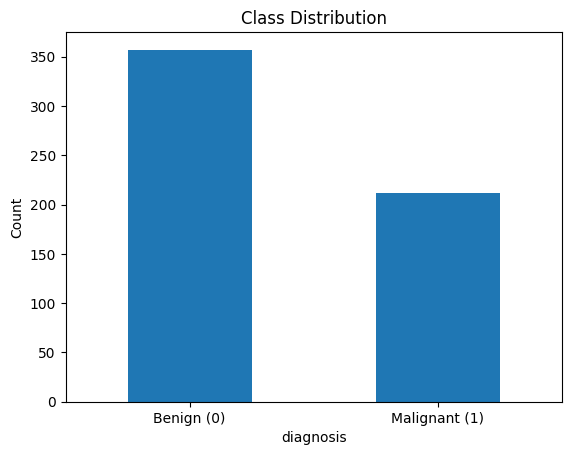

In [4]:
import matplotlib.pyplot as plt

df['diagnosis'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xticks([0,1], ['Benign (0)', 'Malignant (1)'], rotation=0)
plt.ylabel("Count")
plt.show()

In [5]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

print("Feature shape:", X.shape)
print("Target shape:", y.shape)

Feature shape: (569, 30)
Target shape: (569,)


In [6]:
from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training features:", X_train.shape)
print("Testing features:", X_test.shape)

Training features: (455, 30)
Testing features: (114, 30)


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create model
model = RandomForestClassifier(random_state=42)

# Train model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9649122807017544

Confusion Matrix:
[[70  1]
 [ 3 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



AUC Score: 0.9952505732066819


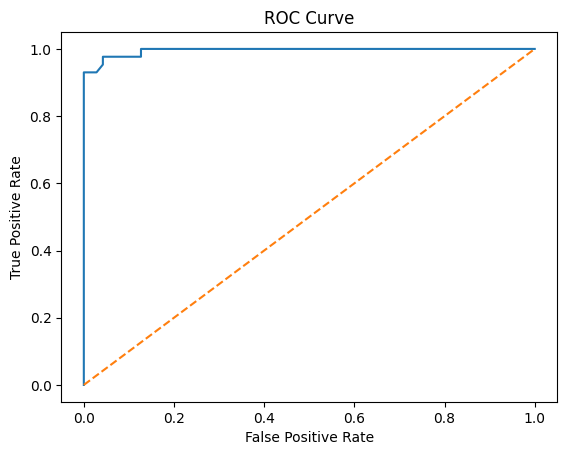

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get prediction probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
auc_score = roc_auc_score(y_test, y_prob)

print("AUC Score:", auc_score)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [9]:
import shap

# Create SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

C:\Users\retwwik yadav\.conda\envs\breast_ai\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
print(type(shap_values))
print(len(shap_values))

<class 'numpy.ndarray'>
114


In [11]:
print(shap_values.shape)
print(X_test.shape)

(114, 30, 2)
(114, 30)


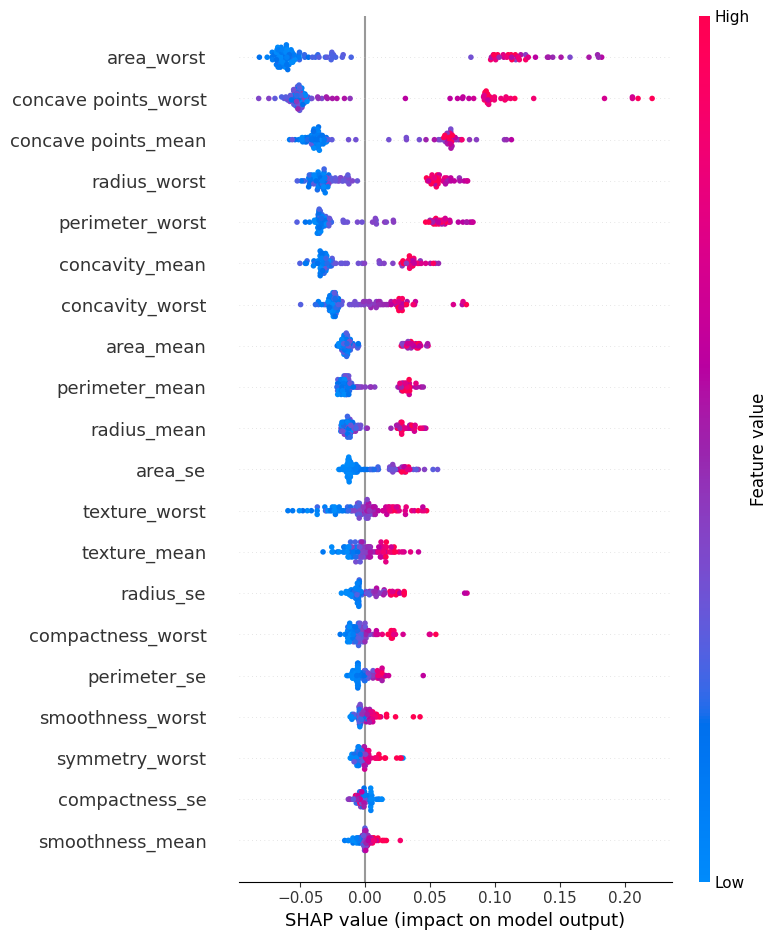

In [12]:
shap.summary_plot(shap_values[:, :, 1], X_test)

In [13]:
# Select one test sample
sample_index = 7  # you can change later
sample = X_test.iloc[sample_index]

print("Actual Diagnosis:", y_test.iloc[sample_index])

Actual Diagnosis: 1


In [14]:
sample_df = X_test.iloc[[sample_index]]

pred = model.predict(sample_df)
prob = model.predict_proba(sample_df)

print("Predicted Class:", pred[0])
print("Prediction Probability:", prob)

Predicted Class: 1
Prediction Probability: [[0.16 0.84]]


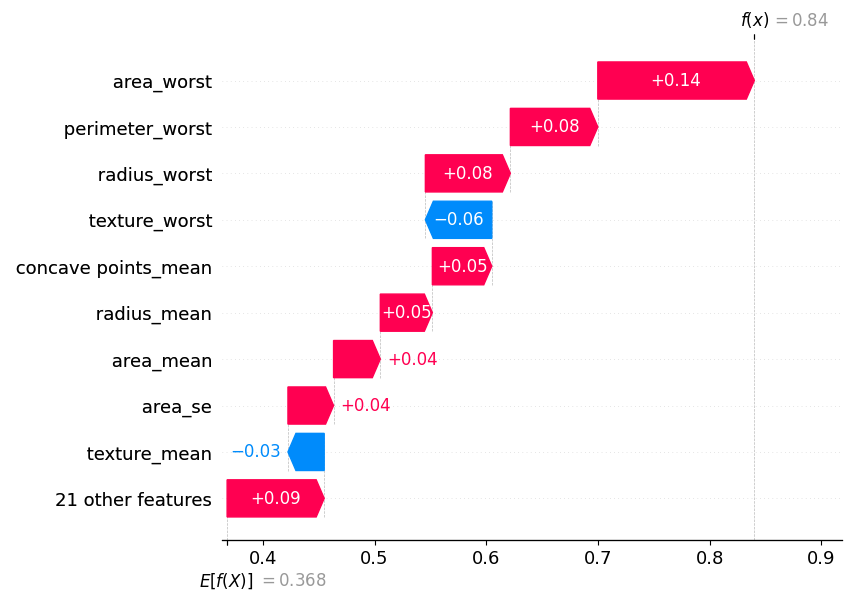

In [15]:
# Get SHAP values for that sample
sample_shap = shap_values[sample_index, :, 1]

# Plot waterfall explanation
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value[1],
    sample_shap,
    sample
)

In [17]:
import numpy as np

malignant_indices = np.where(model.predict(X_test) == 1)[0]
print(malignant_indices[:5])

[1 2 5 6 7]


In [18]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Recreate model (important for clean CV)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

print("Cross Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

Cross Validation Scores: [0.92105263 0.93859649 0.98245614 0.96491228 0.97345133]
Mean CV Accuracy: 0.9560937742586555
Standard Deviation: 0.02283883380490945


In [19]:
import xgboost

In [20]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Create XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

print("XGBoost AUC:", roc_auc_score(y_test, y_prob_xgb))

C:\Users\retwwik yadav\.conda\envs\breast_ai\lib\site-packages\xgboost\training.py:200: UserWarning: [19:58:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.956140350877193

Confusion Matrix:
[[69  2]
 [ 3 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

XGBoost AUC: 0.9927939731411726


In [21]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Recreate XGBoost model (clean instance)
xgb_cv_model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss'
)

# Perform 5-fold cross validation
xgb_cv_scores = cross_val_score(xgb_cv_model, X, y, cv=5, scoring='accuracy')

print("XGBoost CV Scores:", xgb_cv_scores)
print("Mean CV Accuracy:", np.mean(xgb_cv_scores))
print("Standard Deviation:", np.std(xgb_cv_scores))

XGBoost CV Scores: [0.95614035 0.94736842 1.         0.97368421 0.97345133]
Mean CV Accuracy: 0.9701288619779538
Standard Deviation: 0.01805369923682024


In [22]:
import joblib

# Save trained Random Forest model
joblib.dump(model, "../models/random_forest_model.pkl")

['../models/random_forest_model.pkl']

In [23]:
loaded_model = joblib.load("../models/random_forest_model.pkl")

print("Loaded model test prediction:",
      loaded_model.predict(X_test.iloc[[0]]))

Loaded model test prediction: [0]


In [24]:
print(X.columns.tolist())

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
